In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Data Science Projects\Credit Card Fraud\creditcard.csv")

In [11]:

#Lets see some real data
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
188049,127795.0,2.026337,-0.991080,-1.190805,-0.889076,-0.765428,-1.031953,-0.385735,-0.178117,-0.604027,...,0.031870,-0.164866,0.257213,-0.025663,-0.327689,-0.449706,-0.053728,-0.057103,78.54,0
5011,4582.0,-1.351081,1.064695,0.825629,-1.032768,1.961030,4.119642,-0.371524,0.924081,2.370317,...,-0.471701,-0.395687,-0.239931,0.961072,0.162805,0.220573,0.014108,-0.379803,9.20,0
262360,160436.0,1.976629,-1.065099,-0.939382,-0.984491,-0.729147,-0.561768,-0.535987,-0.120669,-0.594506,...,-0.160193,-0.753565,0.355384,-0.444342,-0.581163,-0.693620,-0.029291,-0.041063,105.00,0
204547,135330.0,2.063838,-1.293969,-1.609499,-0.896040,-0.236021,0.387265,-0.714876,0.044394,0.034663,...,0.493083,1.511530,-0.281513,-0.007932,0.511863,0.288032,-0.036997,-0.071503,83.00,0
1430,1106.0,-0.268258,0.084727,-0.128594,-1.879522,-0.399191,-0.651298,-0.385769,-2.917876,0.407322,...,-1.141631,0.506251,-0.200739,0.130981,0.696142,-0.044291,0.059552,0.271403,160.00,0
203830,134986.0,1.508953,-1.228196,-2.027121,0.155608,0.024748,-0.258215,0.310182,-0.111537,0.394058,...,0.383332,0.393292,-0.239276,0.238818,-0.049664,0.739969,-0.167063,-0.030140,304.96,0
21896,31918.0,-1.109704,0.594634,3.390658,1.588509,-0.298745,0.623177,-0.153834,0.559221,-0.225833,...,0.007976,0.113819,-0.283420,0.517042,0.351138,-0.120644,0.057848,0.068449,1.52,0
98662,66756.0,1.261803,-0.324787,0.326159,0.284753,-0.659202,-0.282007,-0.375569,-0.068976,-1.256465,...,-0.190692,-0.100279,-0.141216,-0.001720,0.608002,-0.253021,0.041139,0.020188,37.92,0
23379,32728.0,-0.527646,0.576725,1.015920,0.427220,-0.045692,-0.060269,1.346539,-0.065072,-0.949781,...,0.231792,0.373125,0.081821,0.001940,0.347091,-0.372561,-0.018825,0.025334,169.00,0
256055,157521.0,-1.073022,-0.558096,0.801081,-1.391690,0.965652,2.665406,1.293106,0.502001,0.190103,...,0.066064,-0.026961,0.576641,-2.539117,-0.479956,-0.630085,-0.053784,-0.080078,284.01,0


In [9]:

#Let’s print the full summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Lets see some statistical data for variales.
df.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


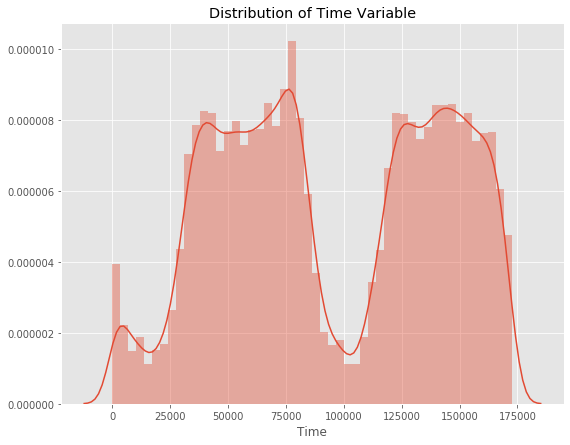

In [14]:
#visualizations of time and amount
plt.figure(figsize=(9,7))
plt.title('Distribution of Time Variable')
sns.distplot(df.Time)

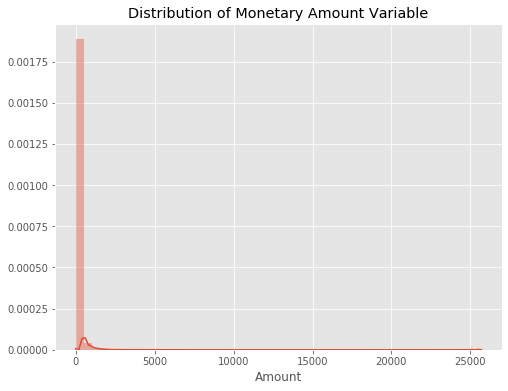

In [16]:
# Lets see distribution of Monetary amount variable
plt.figure(figsize=(8,6))
plt.title('Distribution of Monetary Amount Variable')
sns.distplot(df.Amount)

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

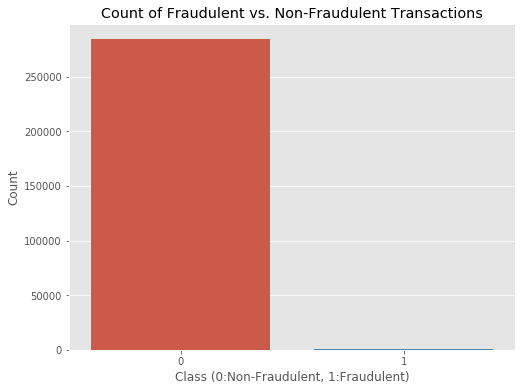

In [23]:
#fraud vs. non-fraud transactions 
pd.value_counts(df.Class)
plt.figure(figsize=(7,5))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

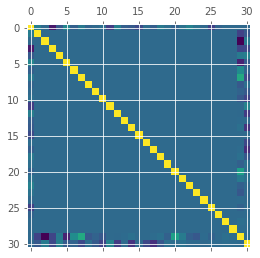

In [27]:
# Correlation of variables
corr = df.corr()
plt.matshow(df.corr())
plt.show()
